# Decision Tree mit ID3
Implementieren Sie den Decision-Tree-Algorithmus ID3 mit dem gegebenen Grundgerüst. Beachten Sie für Ihre Bearbeitung bitte die folgenden Punkte:
- Bitte verwenden Sie in dieser Aufgabe die **Jupyter Notebook** Oberfläche und **nicht Jupyter Lab**. Ansonsten führt die Zeile ``%matplotlib notebook`` zu einem Fehler und muss durch ``%matplotlib inlne`` ersetzt werden. Dann ist jedoch kein vernünftiges Zoomen in die Bilder der Entscheidungsbäume innerhalb der Jupyter Oberfläche mehr möglich.
- Verwenden Sie den Datensatz *house-votes-84-with-header.csv*, den Sie zusammen mit einer kurzen Beschreibung im Moodle finden.
- Nicht jeder Record dieses Datensatzes hat für jedes Attribut einen Wert (mit *?* gekennzeichnet). Implementieren Sie daher Ihren ID3 Algorithmus so, dass er trotzdem eine sinnvolle Zuteilung trifft. Nähere Details dazu entnehmen Sie bitte dem [Paper von Quinlan](https://link.springer.com/article/10.1023%2FA%3A1022643204877).
- Im Paper wird vorgeschlagen nur aus einer Teilmenge der Trainingsdaten den Baum zu bilden, dem sogenannten "Window". Dieses soll dann iterativ vergrößert werden, bis alle nicht im Window befindlichen Daten vom durch das Window gebildeten Baum korrekt klassifiziert werden. Diese Nutzung des Windows brauch von Ihnen NICHT umgesetz werden. Bilden Sie den Entscheidungsbaum direkt mit den kompletten Trainingsdaten!
- Die in Abschnitt 5 beschriebene Behandlung von Rauschen sowie die in Abschnitt 7 vorgestellten Verbesserungen sollen Sie nicht umsetzen.
- **Abgabe bis zum 23.01.2023 23:59 Uhr.** Sie werden uns Ihren Algorithmus kurz vorführen, erklären und ggf. Fragen beantworten.

### Darstellung des Baumes
- Dieses mal ist das Ergebnis ein Baum. Damit Sie sich nicht mit der Darstellung aufhalten, finden sie im gegebenen Grundgerüst eine Methode, die den Baum darstellt.
- Bitte fügen Sie Ihrer Implementierung eine Methode hinzu, die den Baum als Dictionary repräsentiert. Das Dictionary für einen (Teil-)baum hat jeweils zwei Einträge:
    - Ein Eintrag *'node_name'* bildet auf den Namen des Knotens ab (das zu testende Attribut oder bei Blättern die Klassenentscheidung).
    - Ein Eintrag *'children'* bildet auf ein weiteres Dictionary ab. Dieses Dictionary enthält für jeden zu testenden Attributswert einen Eintrag, der auf den darunterliegenden Teilbaum abbildet.
    - Handelt es sich beim aktuellen Knoten um ein Blatt, so gibt es keinen *'children'*-Eintrag.
    - Bitte stellen Sie sicher, dass alle Einträge Strings sind.
- Um Entscheidungsbäume zu plotten benötigen Sie das package [pydot](https://pypi.python.org/pypi/pydot) und die Software [GraphViz](http://www.graphviz.org/). Sie müssen außerdem den 'bin'-Unterordner im Installationspfad von GraphViz zur *Path*-Umgebungsvariable hinzufügen. Bei Problemen mit der Installation melden sie sich bitte bei <stubbemann@cs.uni-kassel.de>.

### Verwendung der Bibliothek *pandas*
In dieser Aufgabe verwenden wir die Bibliothek *pandas*. Die zentrale Funktion dieser Bibliothek ist die Repräsentation und Manipulation von Datensätzen in sogenannten *DataFrames* analog zur Programmiersprache *R*. Ein DataFrame kann man sich wie eine Tabelle vorstellen, die pro Zeile eine Instanz des Datensatzes enthält. Die nach den Attributsnamen benannten Spalten der Tabelle enthalten die jeweiligen Attributswerte der Instanzen. Die Zeilen des DataFrames sind indiziert, typischerweise durch eine ID oder einen Timestamp. Eine Spalte eines DataFrames hat den Datentyp *Series* und enthält alle Indizes zusammen mit dem jeweiligen Spaltenwert sowie den Namen (das Attribut). Im folgenden laden wir den Datensatz für diese Aufgabe und zeigen ein paar Beispieloperationen. Falls Sie mehr Operationen kennenlernen möchten, lesen Sie den Artikel [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html).

### Zusätzliche Pakete
Sie dürfen zusätzlich die Pakete *math*, *random* und *numpy* verwenden.

### Erweiterungen für 6 ECTS
Bearbeiten Sie die folgenden Aufgaben nur, wenn Sie 6 ECTS benötigen!
- Implementieren Sie die Funktion "classification", welche den mittels train berechneten Decision Tree nutzt um die einzelnen Datenpunkte zu klassifizieren. Die Funktion soll eine Liste von Classlabels zurückgeben. Hier soll also der i-te Eintrag die Klassenentscheidung für den i-ten Datenpunkt darstellen.
- Um die Klassifikation von mittels Entscheidungsbäumen zu verbessern wird in der Praxis häufig ein Ensemble von Entscheidungsbäumen verwendet. Dabei wird jeder jeder Baum in der Praxis nur auf einen Teil der Trainingsdaten und der Attribute trainiert.
- Implementieren Sie die Funktion **ensemble**, welche auf Trainingsdaten *d_train* *n_trees* viele Bäume trainiert, welche jeweils einen Anteil von *data_ratio* Datenpunkten und *attributes_ratio* viele Attribute pro Baum zufällig auswählen. Dabei soll jeweils aufgerundet werden. Die Ergebnisliste soll für jeden Datenpunkt in *d_test* jeweils ein Dictionary zurückgeben, welches für jede Klasse die Wahrscheinlichkeit entält.
- Beispiel: Wir haben die Klassen "A" und "B" und wählen *data_ratio*=*attributes_ratio*=0.7 und *n_trees*=10. Dann sollen 10 Bäume mit jeweil 70% der Trainingsdaten und Attrbiute trainiert werden. Diese sollen jeweils zufällig gewählt werden. Taucht in der Ergebnisliste an 3.Stelle das Dictionary {"A": 0.7, "B": 0.3} auf, heißt dass, das der dritte Datenpunkt in den Trainingsdaten zu 70% zu Klasse "A" gehört, weil 7 von 10 Bäumen ihn so klassifizert haben.

In [9]:
import pandas as pd

In [10]:
# Read data from a csv-file.
df = pd.read_csv('house-votes-84-with-header.csv')

# Show the first n elements of the data-frame with optional parameter n (default n=5). 
df.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [18]:
# Show number of rows (instances) and colums (attributes) of the data-set.
df.shape

(435, 17)

In [19]:
# Select a column.
labels = df['class']

# Get the unique values of a column. Returns a numpy array.
labels.unique()

array(['republican', 'democrat'], dtype=object)

In [20]:
# Select the subset of the data for which an attribute/a column has a given value. Returns a data-frame. 
df_democrats = df.loc[df['class'] == 'democrat']

# Implementierung des Entscheidungsbaums
In diesem Teil implementieren Sie den ID3-Algorithmus.

In [22]:
import numpy as np
from math import ceil # To round up
import random # For sampling etc.
from numpy import log2 as log

eps = np.finfo(float).eps

class DecisionTree():
    
    def __init__(self):
        self.children = []
        self.att_missing_val = '?'
        self.att_class = 'class'
        self.is_leaf = False
        # TODO Here you can also change class properties, if you do not need them.
        self.node_name = None
        self.next = None
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.info_gain = info_gain
        
#         # for leaf node   ?
#         self.value = value

    def train(self, data):
        """ Trains this classifier on a given pandas DataFrame.
        The data has categorical attributes and one binary class-attribute (i.e. there exist two classes)."""

        unique_classes = data[self.att_class].unique()
        n_classes = len(unique_classes)
        assert(n_classes in {1,2})

        # TODO
        feature_ids = data.keys()[1:]
        self.trainRecursiv(data,feature_ids)
        pass
        
        
    def trainRecursiv(self,data):
        #basis: 1.pure class
        
        
        #2. keine features
        
        #rekursive
        # choose the feature that maximizes the information gain
        self.node_name = self.find_winner(data)

        
        childrenList = np.unique(df[self.node_name])
        for value in childrenList:
            child = DecisionTree()
            child.node_name = value
            self.children.append(child)
            subtable = self.get_subtable(data, self.node_name, value)
            clValue, counts = np.unique(subtable[Class], return_counts=True)
            print(value)
            a = DecisionTree()
            if len(counts) == 1:  # Checking purity of subset
                a.node_name = clValue[0]
                a.is_leaf = True
                a.children = None
                print(a)
                return a
            else:
                a = self.train(subtable)  
                pass


def find_winner(self,df):
    informationGain = []  # information gain
    for attribute in df.keys()[1:]:          # anything but the first one
        informationGain.append(self.find_entropy(df) - self.find_entropy_attribute(df, attribute))
        # find entropy of entire Dataframe - the entropy of all the possiable values of paticule attrubute
    return df.keys()[1:][np.argmax(informationGain)]

def find_entropy(self,df):
    # df.keys(): attributs name of df
    # -1 play
    Class = df.keys()[0]  
    entropy = 0
    patien = df[Class].unique()
    for patei in patien:
        fraction = df[Class].value_counts()[patei] / len(df[Class])
        entropy += -fraction * np.log2(fraction)
    return entropy


def find_entropy_attribute(self, df, attribute):
     # e.g attribute ist outlook
    Class = df.keys()[0]  # To make the code generic, changing target choice class name
    parteien = df[Class].unique()  # 'republican' and 'democrat'
    choices = df[attribute].unique()  # ['n', '?', 'y']

    #für alle variale die Nummer zählen:
    dictValues = {}
    for choice in choices:  # ['n', '?', 'y']
        for partei in parteien:
            num = len(df[attribute][df[attribute] == choice][df[Class] == partei])
            dictValues[choice+partei] = num
            
    # ratio für yes und no zählen
    for choice in choices:
        if choice == '?':
                continue
        rationZaeler = 0
        for partei in parteien:
            rationZaeler = rationZaeler + dictValues[choice+partei]
        dictValues[choice + 'ration'] = rationZaeler /len(df[Class])
#     print(dictValues)

    # alle vatiable richtig mit unknown  
    dictValuesWithUnknow = {}
    for choice in choices:
        if choice == '?':
                continue
        for partei in parteien:
            num = dictValues[choice+partei] + dictValues['?'+partei] * dictValues[choice+'ration']
            dictValuesWithUnknow[choice+partei] = num
    
    entropy2 = 0
    for choice in choices:
        if choice == '?':
            continue
        entropy = 0
        den = 0
        for partei in parteien:  # 'republican' and 'democrat'
            num = dictValuesWithUnknow[choice+partei]
            den = len(df[attribute][df[attribute] == choice])
            fraction = num / den
            entropy += -fraction * log2(fraction)
        fraction2 = den / len(df)
        entropy2 += -fraction2 * entropy
    return abs(entropy2)

    def get_subtable(self,data, node, value):
        # potion of csv.file and need subtable
        # node: attribute, value of the attribute
        df_value = df.loc[df[node] == value]
        return df_value
    
    

    def to_dictionary(self):
        # TODO
        pass
    
# ######Everything under this line is only needed for 6ECTS. Remove it if you just need 3ECTS!######    
#     def classification(self, data):
#         """
#         Uses the trained Decision tree to classify all data points of the given DataFrame.
#         The data has categorical attributes and one binary class-attribute (i.e. there exist two classes).
#         """
#         # TODO
#         pass


# def ensemble(d_train,
#              d_test,
#              n_trees=10,
#              data_ratio=0.7,
#              attributes_ratio=0.7):
#     """
#     Train n_trees for classification, where every tree just uses a sample of the training data
#     and the attributes.
#     """
#   # TODO
#     pass

# Ausführung Ihres Algorithmus
Ab hier bitte nichts mehr ändern. Die Datei *plot_tree.py* enthält neben der Methode zum Plotten auch ein Beispiel für die erwartete Datenstruktur.

<IPython.core.display.Javascript object>


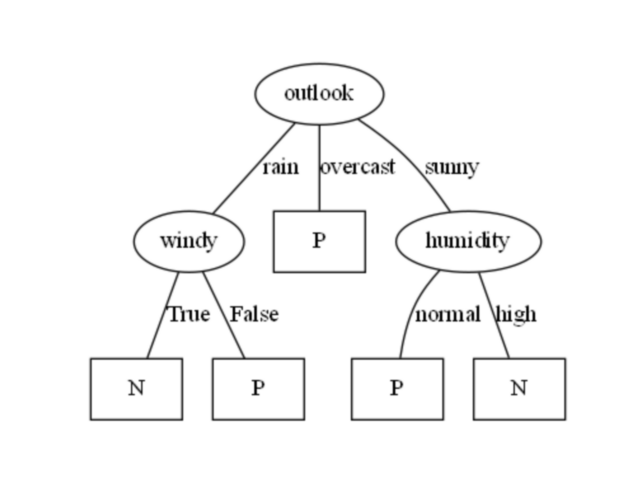

In [23]:
from plot_tree import plot_tree, example_tree_dict
%matplotlib notebook

# If you remove the comment symbol, you can test whether you've installed graphviz and pydot correctly.
plot_tree(example_tree_dict)

In [24]:
tree = DecisionTree()
tree.train(df)

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


KeyboardInterrupt: 

In [ ]:
plot_tree(tree.to_dictionary())

# Ausführung auf alternativem Datensatz
Hier können Sie Ihre Implementierung auf einem weiteren Datensatz testen.

In [ ]:
df2 = pd.read_csv('id3-test.csv', header=None)
df2.rename(columns={0: 'class', 1: 'outlook', 2: 'temperature', 3: 'humidity', 4: 'windy'}, inplace='True')
df2 = df2.applymap(str)
df2.head()

In [ ]:
tree2 = DecisionTree()
tree2.train(df2)
plot_tree(tree2.to_dictionary())

## Test for 6 ECTS 
Remove if you just need 3ECTS!

In [ ]:
def confusion_matrix(predictions, targets):
    """ Returns a tuple (labels, m) where m is the confusion matrix and 
    labels is the list of matrix rows/columns in same order as in the matrix.
    Rows in the confusion matrix indicate the true target label
    whereas the columns indicate the predicted label of samples. """
    assert(len(predictions) == len(targets))
    
    # Map each label to an index.
    unique_vals = list(set(predictions).union(targets))
    mapping = {label: index for index, label in enumerate(unique_vals)}
    
    # Build and fill the confusion matrix.
    m = [[0]*len(mapping) for _ in range(len(mapping))]
    for p, t in zip(predictions, targets):
        row, col = mapping[t], mapping[p]
        m[row][col] += 1
    return unique_vals, m

def accuracy(predictions, targets):
    """ Calculates the accuracy for the given class predictions and true classes."""
    assert(len(predictions) == len(targets))
    n_correct = len([p for p,t in zip(predictions, targets) if p==t])
    return n_correct/len(predictions)

def split_data(df,
              test_size,
              random_state):
    #Shuffle data
    df = df.sample(frac=1,
                   random_state=random_state)
    # Split data
    k = ceil(len(df)*test_size)
    return df[:k], df[k:]

# Do train test split
d_train, d_test = split_data(df, test_size=0.5, random_state=42)
tree = DecisionTree()
tree.train(d_train)
labels = list(d_test["class"])
results = tree.classification(d_test)
classes, matrix = confusion_matrix(results, labels)
accuracy_score = accuracy(labels, results)
print('Confusion matrix:')
print(classes)
for row in matrix:
    print(row)
print('----------')
print("Accuracy: ", accuracy_score)

In [ ]:
result = ensemble(d_train, d_test)
result

In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))